<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Ensemble-Learning/RF_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Prediction with RandomForest model

**Context**

* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


**Objective:**

* To build a random forest model that accurately predicts the likelihood of stroke in patients based on their individual characteristics, including gender, age, diseases, and smoking status.
* This model will assist healthcare professionals in identifying high-risk individuals for early intervention and prevention efforts.


**Data Dictionary:**

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

stroke: 1 if the patient had a stroke or 0 if not

#Importing all necessary libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset

In [66]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Checking info**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**All the columns are in correct data types.**

**Checking null values**

In [68]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


* We have null values in the column 'bmi'.

**Null value Imputation**

In [69]:
df['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
27.7,37
27.6,37
26.7,37
...,...
47.9,1
13.0,1
13.9,1


In [70]:
df['bmi'].mean()

np.float64(28.893236911794666)

In [71]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [72]:
df['bmi'].isnull().sum()

np.int64(0)

In [73]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


**Now, there are no null values in the data.**

**Checking Duplicates**

In [74]:
df.duplicated().sum()

np.int64(0)

**There are no duplicate values in the dataset.**

#Summary Ststistics**

In [75]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Observations**

* For 'age','bmi' column mean and median are almost same,implying that the data is distributed symetrically.
* For columns 'hypertension', 'heart_disease','avg_glucose_level' mean is significantly greater than mean, implying there are outliers in the left tail.

#Data Visualization

<Axes: xlabel='stroke', ylabel='count'>

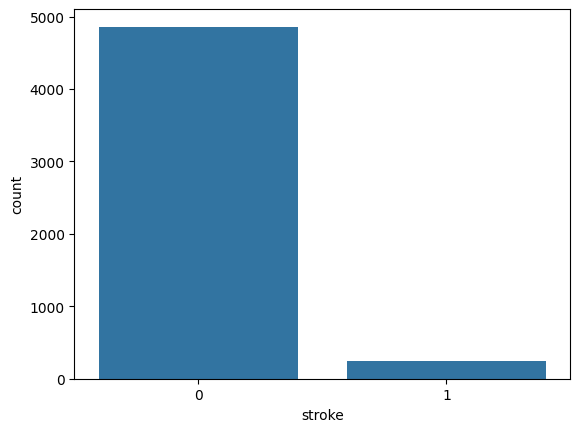

In [76]:
sns.countplot(x='stroke',data=df)

**Observation**
There is an imbalance in the dataset.

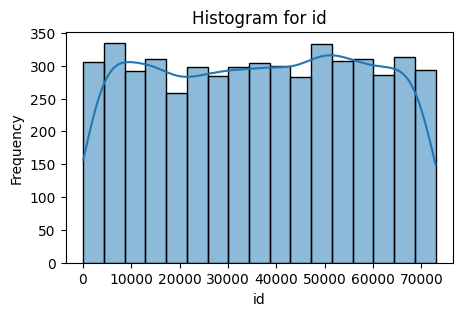

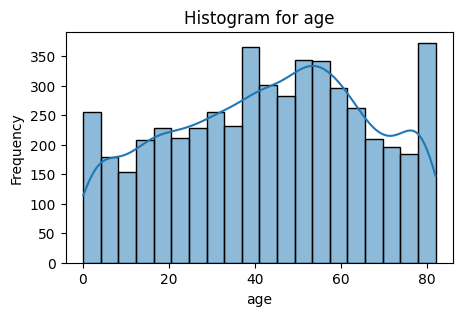

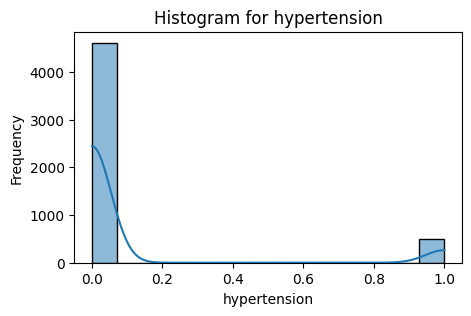

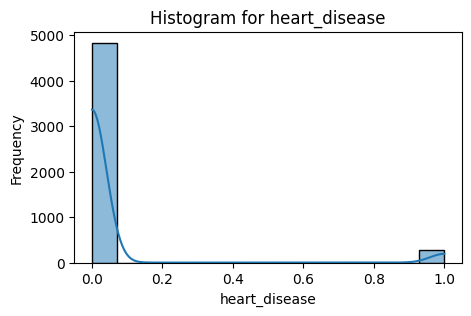

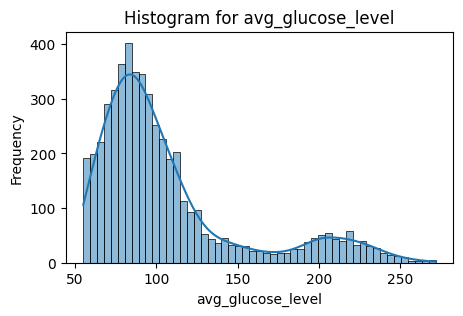

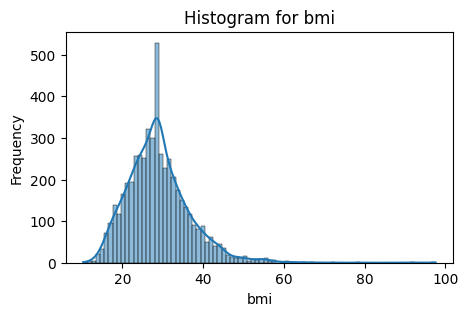

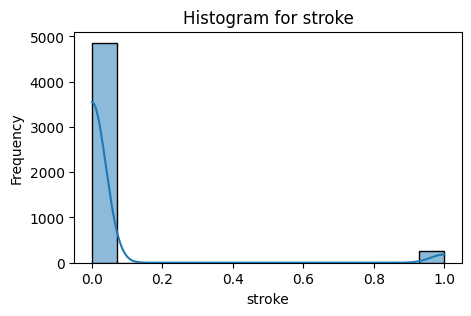

In [77]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.histplot(df[col],kde=True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

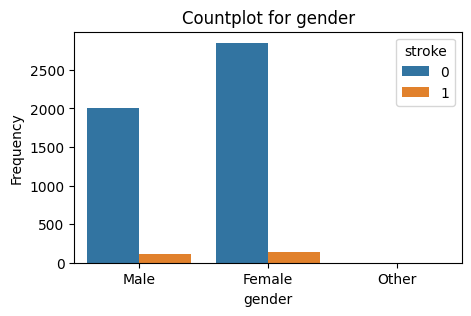

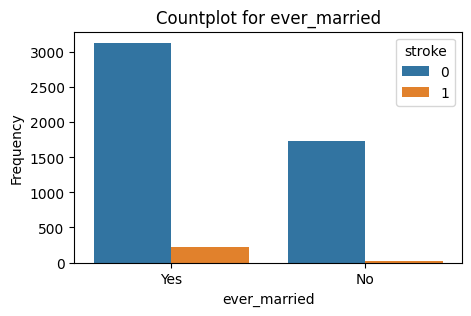

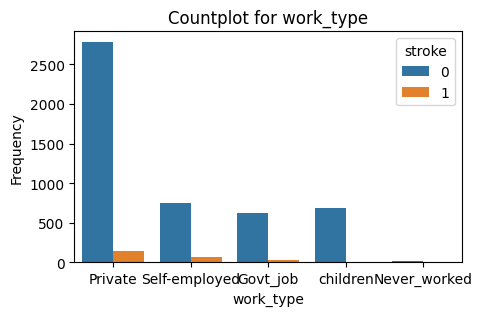

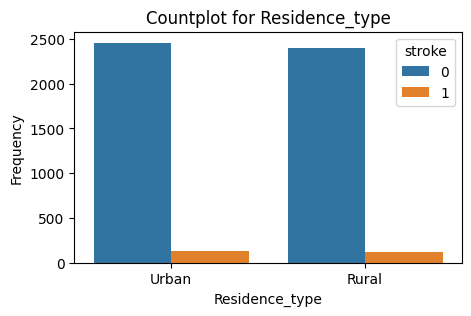

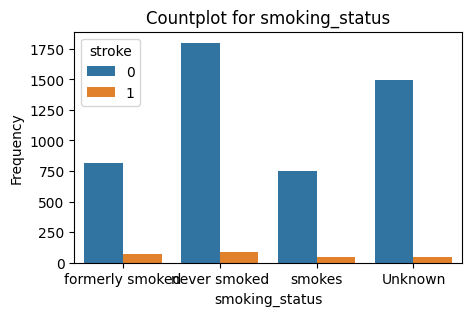

In [78]:
for col in df.select_dtypes(exclude=np.number):
  plt.figure(figsize=(5,3))
  sns.countplot(x=col,data=df,hue='stroke')
  plt.title(f'Countplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

**From all the plots, we can clearly see the imbalance in the data set.**

#performing onehot encoding on categorical columns.

In [79]:
df=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [80]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,44873,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,19723,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


#Data preprocessing

In [81]:
df=df.drop('id',axis=1)

**Seperating input features and target feature.**

In [82]:
X=df.drop('stroke',axis=1)
y=df['stroke']


#Performing feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

scaling =StandardScaler()
Scaled_X=scaling.fit_transform(X)

#Splitting the data into training and testing data

In [84]:
X_train,X_test,y_train,y_test=train_test_split(Scaled_X,y,test_size=0.2,random_state=5)

#Building the DecisionTreeclassifier model with entropy as criterion.

In [87]:
# Creating a Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100)

# Fitting the data
model.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
# Taking the predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [89]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.95
Testing Precision:  0.0
Testing Recall:  0.0
Testing F1 Score:  0.0


 **Model is Overfitted,**

#Hyperparameter tunning using GridSearchCV() to optimize the model performance

In [96]:
# GridSearchCV()
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}



In [97]:
# Using GridSearchCV
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [98]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [100]:
# Creating the Optimal Model
model =RandomForestClassifier(n_estimators=100,criterion = 'gini', max_depth = None, min_samples_split = 10)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10)

In [101]:
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [102]:
# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

Training Accuracy : 0.95
Training Precision : 0.96
Training Recall : 0.95
Training F1 Score : 0.93

Testing Accuracy : 0.95
Testing Precision : 0.9
Testing Recall : 0.95
Testing F1 Score : 0.92


**Observations:**
* We can observe that the model performance has increased after tuning Hyperparameters using GridSearchCV.

#Conclusion:

The developed Random Forest model accurately predicts stroke likelihood with 95% accuracy and a balanced precision-recall trade-off. It effectively addresses the problem statement by providing a reliable tool for identifying high-risk individuals, enabling early intervention and potentially reducing stroke incidence. While demonstrating slight overfitting, the model generalizes well and holds promise for improving patient outcomes in clinical settings.